# 1) Questões de Negócio
Nome da Empresa: House Rocket<br>
Modelo de Negócio: Compra e venda de imóveis, obtendo lucro pela revenda.<br>
Problemas de Negócio: 
1. Quais os imóveis que a House Rocket deveria comprar e por qual preço?
2. Uma vez comprados, quando será a melhor época para revender e por qual preço?
3. Valide as *hipóteses de negócio*.

# 2) Planejamento da Solução

### Produto Final
- Dashboard disponível online 24/7, contendo:
  - 2 tabelas referentes a recomendações de imóveis e preços de compra e revenda.
  - Visualizações correspondendo a validação de cada uma das hipóteses de negócio.

### Planejamento das Ferramentas
- Python 3.10.*
- Pandas, Numpy
- Matplotlib e Seaborn
- Streamlit
- Cloud Heroku

### Processo
##### 1) Quais os imóveis que a House Rocket deveria comprar e por qual preço?
1. Agrupar os imóveis por região;
2. Aplicar mediana do preço de cada região;
3. Selecionar imóveis que estejam abaixo do preço mediano de sua região e que estejam em boas condições;
##### 2) Uma vez comprados, quando será a melhor época para revender e por qual preço?
1. Criar coluna season, que indica a estação do ano que o imóvel foi vendido.
2. Agrupar os imóveis por região e por sazonalidade (season);
3. Calcular preço mediano de cada grupo;
4. Selecionar aqueles imóveis que estejam em boas condições e que possuam seu preço abaixo da mediana de seu grupo; 
##### 3) Valide as seguintes *hipóteses de negócio*:
1. Imóveis que possuem vista para água, são 20% mais caros, na média.
    * Selecionar os imóveis que possuem o valor da coluna 'waterfront' igual a 1
    * Calcular o preço médio desse grupo de imóveis
    * Comparar com o preço médio de todos os imóveis e calcular a porcentagem de aumento/redução
2. Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
    * Selecionar os imóveis com o valor da variável *yr_built* menor que 1955
    * Calcular a média dos preços destes imóveis
    * Comparar com o preço médio de todos os imóveis e calcular a porcentagem de aumento/redução
3. Imóveis sem porão - possuem área total (sqrt_lot) - são 40% maiores do que os imóveis com porão.
    * Selecionar os imóveis que possuem o valor da variável 'sqft_basement' igual a 0 e calcular a média das áreas
    * Selecionar os imóveis que possuem o valor da variável 'sqft_basement' maior que 0 e calcular a média das áreas
    * Calcular a porcentagem de aumento/reducao médio entre os dois grupos
4. O crescimento do preço dos imóveis YoY (Year over Year) é de 10%.
    * Agrupar os imóveis por ano e agregar seus valores na média.
    * Calcular a porcentagem de aumento/redução entre os anos
5. Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%.
    * Selecionar os imóveis que possuem 3 banheiros
    * Agrupar os imóveis por mês e calcular o preço médio de cada mês
    * Calcular as porcentagens de aumento/redução de cada um dos meses com o mês imediatamente anterior
    * Tirar a média de todas as porcentagens de aumento/redução dos valores acima
6. Imóveis com mais números de quarto são em média 10% mais caros do que outros imóveis com 1 unidade de quartos a menos, em média.
    * Agrupar os imóveis pela variável 'bedrooms'
    * Agregar a média dos preços de cada subgrupo
    * Iterar sobre o novo dataframe resultante dos cálculos anteriores e criar um array contendo a porcentagem de acréscimo/redução de um mês com o seu antecessor
    * Uma vez o array preenchido com as porcentagens de aumento/reducao, tirar a média destes valores
7. A variação média no preço dos imóveis entre as categorias da variável *condition*, indicam um acréscimo médio de 15% de uma para outra.
    * Agrupar os dados pela variável 'condition'
    * Agregar a média de seus valores
    * Criar gráfico de barras que mostre a comparação entre as categorias da variável 'condition' e a média de seus preços
    * Tirar a média das porcentagens de aumento/redução de uma categoria para outra dentre todas as categorias com relação a imediatamente anterior, já que estes dados categóricos a ordem importa
8. Imóveis em más condições - 'condition' < 3 - mas possuem vista para o mar, são 10% mais caras, na mediana do que imóveis nas mesmas condições, mas sem vista para o mar.
    * Selecionar os imóveis que possuem o valor da variável 'condition' menor que 3 e que possuem waterfront igual a 1.
    * Selecionar os imóveis que possuem o valor da variável 'condition' menor que 3 e que possuem waterfront igual a 0.
    * Calcular a mediana dos preços de cada um dos grupos acima
    * Calcular a porcentagem de aumento/redução dos preços comparativos acima
9.  Para cada nível da variável 'grade', o preço médio dos imóveis aumenta em 18%.
    * Agrupar o imóveis por 'grade'
    * Calcular os preços médios de cada categoria acima
    * Calcular a porcentagem de aumento/redução dos preços comparativos acima
10. O crescimento WoW (Week over Week) do preço das propriedades é de 0.1%, na média.
    * Agrupar os dados por semana
    * Agregar a média dos preços de cada subgrupo de imóveis
    * Calcular a média dos aumentos/reduções semanais consecutivos

# 3) Coleta e Limpeza dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [3]:
data.shape

(21613, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


Checando por linhas com todos os campos duplicados.

In [6]:
data.duplicated().sum()

0

Checando por valores nulos, mas como o observado no output do método 'info()', não há valores nulos por agora.

In [7]:
data.isna().any().sum()

0

Validando os tipos dos dados das variáveis, realizando castings apropriados.

In [8]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# 4) Transformação dos Dados

Criando algumas funções que irão auxiliar ao longo da análise.

In [9]:
# Calcula valores máximos e mínimos que dados após esses valores serão considerados como Outliers
def find_outlier_trashhold(quantile, col, data, factor=2):
    iqr = data[col].quantile(0.75) - data[col].quantile(0.25)
    trash_hold = iqr * factor
    if (quantile > 0.25):
        return data[col].quantile(0.75) + trash_hold
    else:
        return data[col].quantile(0.25) - trash_hold

In [10]:
def remove_outliers(data, cols):
    """
    Retorna um dataframe após a remoção dos outliers.
    
    :param data: O dataframe a ter seus valores outliers removidos.
    :type data: DataFrame
    :param cols: Colunas específicas do dataframe que passarão pelo processo de exclusão dos outliers.
    :type cols: Lista
    """
    for col in cols:
        data = data.loc[(data[col] > find_outlier_trashhold(0.25, col, data)) & (data[col] < find_outlier_trashhold(0.75, col, data))]
    return data

In [11]:
def define_season_by_date(date):
    year = date.year
    winter1 = pd.date_range(start=f'{year-1}-12-01', end=f'{year}-02-28')
    spring = pd.date_range(start=f'{year}-03-01', end=f'{year}-05-31')
    summer = pd.date_range(start=f'{year}-06-01', end=f'{year}-08-31')
    fall = pd.date_range(start=f'{year}-09-01', end=f'{year}-11-30')
    winter2 = pd.date_range(start=f'{year}-12-01', end=f'{year+2}-02-28')
    if date in spring:
        return 'spring'
    elif date in summer:
        return 'summer'
    elif date in fall:
        return 'fall'
    elif (date in winter1) or (date in winter2):
        return 'winter'
    else:
        return np.NaN

In [12]:
def diff_mean(val1, val2):
    percent = round(100*(val2 - val1)/val1,2)
    return percent

In [13]:
def calculate_consecutive_percentage(df, col):
    arr1=[]
    for i in range(1, df.shape[0]-1):
        val1=df.loc[i-1, col]
        val2=df.loc[i, col]
        result=diff_mean(val1, val2)
        arr1.append(result)

    return np.mean(arr1)

Precisaremos realizar algumas transformações nos tipos de dados de algumas variáveis, nomeadamente:
- date: datetime
- condition: category
- waterfront: category

In [14]:
data['date'] = pd.to_datetime(data['date'])
data['date'].dtype

dtype('<M8[ns]')

In [15]:
data['condition'] = data['condition'].astype('category')
data['condition'].unique()

[3, 5, 4, 1, 2]
Categories (5, int64): [1, 2, 3, 4, 5]

In [16]:
data['waterfront'] = data['waterfront'].astype('category')
data['waterfront'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [17]:
data['view'] = data['view'].astype('category')
data['view'].unique()

[0, 3, 4, 2, 1]
Categories (5, int64): [0, 1, 2, 3, 4]

In [18]:
data_numeric, data_category = data.select_dtypes(include=['int', 'float']), data.select_dtypes(exclude=['int', 'float'])

In [19]:
data_category.describe()

/tmp/ipykernel_5793/3387595875.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_category.describe()


,date,waterfront,view,condition
count,21613,21613.00,21613.00,21613.00
unique,372,2.00,5.00,5.00
top,2014-06-23 00:00:00,0.00,0.00,3.00
freq,142,21450.00,19489.00,14031.00
first,2014-05-02 00:00:00,NaN,NaN,NaN
last,2015-05-27 00:00:00,NaN,NaN,NaN


Criando novas colunas que nos auxiliarão ao longo das análises

In [20]:
data['has_basement'] = data.apply(lambda x: 1 if x['sqft_basement'] != 0 else 0, axis=1)
data['has_basement'] = data['has_basement'].astype('category')

In [21]:
data['new_house'] = data.apply(lambda x: 1 if x['yr_built'] < 1955 else 0, axis=1)
data['new_house'] = data['new_house'].astype('category')

In [22]:
data['week'] = data['date'].dt.week
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

/tmp/ipykernel_5793/3888575137.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['week'] = data['date'].dt.week


In [23]:
data['season'] = data['date'].map(define_season_by_date)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,has_basement,new_house,week,month,year,season
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,47.51,-122.26,1340,5650,0,0,42,10,2014,fall
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,47.72,-122.32,1690,7639,1,1,50,12,2014,winter
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,47.74,-122.23,2720,8062,0,1,9,2,2015,winter
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,47.52,-122.39,1360,5000,1,0,50,12,2014,winter
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,47.62,-122.05,1800,7503,0,0,8,2,2015,winter


# 5) Análise Exploratória dos Dados

Analisando a distribuição da variável `price`

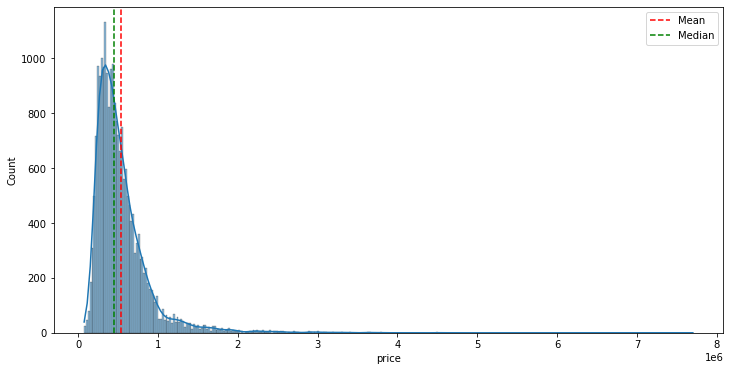

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data['price'], kde=True, ax=ax)
ax.axvline(x=data['price'].mean(), label='Mean', linestyle='--', color='r')
ax.axvline(x=data['price'].median(), label='Median', linestyle='--', color='g')
ax.legend()

plt.show()

Nota-se que a distribuição está inclinada para a esquerda, caracterizando uma Positively Skewed Distribution. Além disso, nota-se que os dados não estão muito compactos, também indicando uma maior dispersão entre eles. Apesar disso é visível que os valores da média e mediana estão relativamente próximos, podemos tirar como conclusão que apesar de existirem outliers, seus valores não são tão extremos assim.

### Removendo outliers

In [25]:
data.shape

(21613, 27)

In [26]:
data_shortened = data.copy()

In [27]:
# Removendo outliers de todas as variáveis numéricas do dataframe, passadas como segundo parâmetro para a função. 
# Generalizando como outliers valores acima ou abaixo de 2 vezes o valor do IQR da variável.
data_shortened = remove_outliers(data_shortened, ['price', 'bedrooms', 'bathrooms', \
       'sqft_living', 'sqft_lot', 'floors'])

In [28]:
data_shortened.shape

(18243, 27)

In [29]:
data = data_shortened

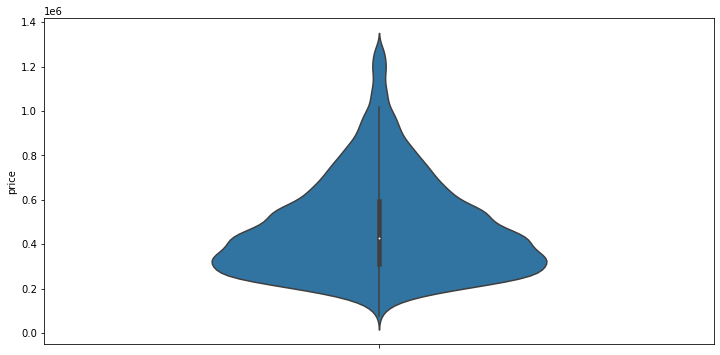

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.violinplot(y=data['price'], width=.5)

plt.show()

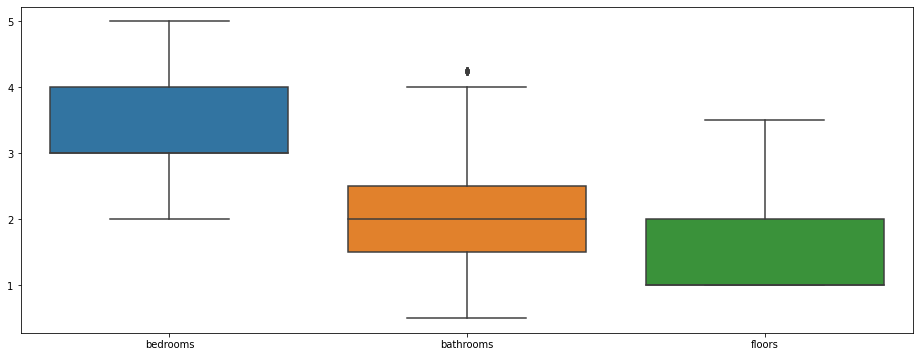

In [31]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.boxplot(data=data[['bedrooms', 'bathrooms', 'floors']])

plt.show()

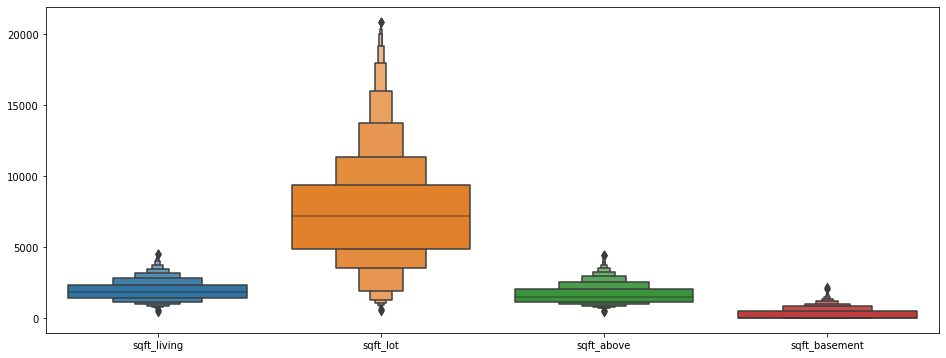

In [32]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.boxenplot(data=data[['sqft_living', 'sqft_lot','sqft_above', 'sqft_basement']])

plt.show()

### Gerando **Relatório 1**: 
#### **1) Quais os imóveis que a House Rocket deveria comprar e por qual preço?**

In [33]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'has_basement',
       'new_house', 'week', 'month', 'year', 'season'],
      dtype='object')

Criando um novo objeto dataframe que é uma copia do DF que vinhamos trabalhando até então, armazeno os nomes das colunas ue serão mantidas para o DF final e por fim, agrupo os dados pela variável zipcode (região) e aplico a mediana dos preços de cada grupo, salvando no DF `df_median_price`.

In [34]:
df_rep1 = data.copy()
rel_cols = ['id', 'date', 'zipcode', 'season', 'price','Median Price', 'condition', 'status']
df_median_price = data.groupby('zipcode').agg({'price': 'median'})
df_median_price.head()

,price
zipcode,
98001,256000.00
98002,234000.00
98003,263750.00
98004,867500.00
98005,710000.00


**Primeiro Método** para criar coluna *Median Price* apartir do dataframe *df_median_price* no dataframe resultante do relatório 1:<br>
* Com o método `map` do Pandas, eu posso iterar sobre uma Series, que neste caso são os valores da coluna *zipcode*, e já que os valores de zipcode do dataframe resultante 1 são os índices do último dataframe resultante do agrupamento, nós podemos utilizar o valor de zipcode de cada linha do DF resultante para obter seu respectivo preço mediano obtido pelo agrupamento anterior.

In [35]:
# Método 1
df_rep1['Median Price'] = df_rep1['zipcode'].map(lambda x: df_median_price.loc[x].price)
df_rep1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,has_basement,new_house,week,month,year,season,Median Price
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,-122.26,1340,5650,0,0,42,10,2014,fall,275000.00
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,-122.32,1690,7639,1,1,50,12,2014,winter,422000.00
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,-122.23,2720,8062,0,1,9,2,2015,winter,433000.00
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,-122.39,1360,5000,1,0,50,12,2014,winter,485000.00
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,-122.05,1800,7503,0,0,8,2,2015,winter,625000.00


In [36]:
df_median_price.rename(columns={'price': 'Median Price M2'}, inplace=True)

**Segundo Método** para criar coluna *Median Price* apartir do dataframe *df_median_price* no dataframe resultante do relatório 1:<br>
* Com o método `merge` fazer a junção dos dois dataframes anteriores, o *df_median_price* e o *df_rel1*, pelos seus valores da coluna 'zipcode', sendo um left join.

In [37]:
# Método 2
df_rep1 = df_rep1.merge(df_median_price, how='left', left_on='zipcode', right_index=True)
df_rep1.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,has_basement,new_house,week,month,year,season,Median Price,Median Price M2
15221,1250203135,2014-07-01,725000.00,3,1.75,1860,6000,2.00,0,2,...,3030,7119,0,0,27,7,2014,summer,446800.00,446800.00
21427,1085623630,2014-10-03,436952.00,4,2.50,2708,4772,2.00,0,0,...,2502,4900,0,0,40,10,2014,fall,297300.00,297300.00
14138,1643500072,2014-09-05,375000.00,4,2.25,1450,7245,1.00,0,0,...,1660,7800,0,1,36,9,2014,fall,375000.00,375000.00
9978,11510700,2014-05-19,755000.00,4,2.50,2660,10452,2.00,0,0,...,2890,9025,0,0,21,5,2014,spring,600000.00,600000.00
18159,4399200085,2015-03-05,315000.00,4,2.25,2550,9736,1.00,0,0,...,1770,9686,0,0,10,3,2015,spring,234000.00,234000.00


Agora nós iremos selecionar as casas do dataframe resultante 1 (*df_rep1*), que tenham o seu preço inferior ao da mediana de sua região e que ao mesmo tempo estejam em boas condições, atribuindo-as o valor de status 'Buy', significando que elas foram recomendadas para compra.

In [38]:
df_rep1['status'] = df_rep1.apply(lambda x: 'Buy' if (x['price'] < x['Median Price']) and (x['condition'] == 3) else 'Not Buy', axis=1)
print(df_rep1['status'].shape)
print(df_rep1['status'].unique())

(18243,)
['Buy' 'Not Buy']


Selecionando apenas os imóveis que possuam o valor de 'Buy', na sua coluna *status*. Também obtendo apenas aquelas colunas que foram definidas no vetor `rel_cols` no início desta seção.

In [39]:
df_rep1 = df_rep1.loc[df_rep1['status'] == 'Buy', rel_cols]
df_rep1.shape

(5809, 8)

**Relatório 1 finalizado!** Foram selecionados **5809 imóveis** que satisfazem critérios de seleção, que os classificam como boas opções de negócio para o CEO da House Rocket.

In [40]:
df_rep1.head(10)

,id,date,zipcode,season,price,Median Price,condition,status
0,7129300520,2014-10-13,98178,fall,221900.00,275000.00,3,Buy
2,5631500400,2015-02-25,98028,winter,180000.00,433000.00,3,Buy
4,1954400510,2015-02-18,98074,winter,510000.00,625000.00,3,Buy
6,1321400060,2014-06-27,98003,summer,257500.00,263750.00,3,Buy
8,2414600126,2015-04-15,98146,spring,229500.00,295000.00,3,Buy
9,3793500160,2015-03-12,98038,spring,323000.00,326992.00,3,Buy
16,1875500060,2014-07-31,98019,summer,395000.00,402750.00,3,Buy
22,7137970340,2014-07-03,98092,summer,285000.00,297300.00,3,Buy
23,8091400200,2014-05-16,98030,spring,252700.00,280000.00,3,Buy
28,5101402488,2014-06-24,98115,summer,438000.00,560750.00,3,Buy


### Gerando **Relatório 2**:
#### **2) Uma vez comprados, quando será a melhor época para revender e por qual preço?**

- Agrupar os dados por região(zipcode) e sazonalidade(primavera/verao/outono/inverno)
- Descobrir a mediana do preço de cada agrupamento
- Se o valor do imóvel for superior ao preço do seu agrupamento
  - Definir o preço de venda como: preço de compra + 10%
- Se não, se o valor do imóvel for inferior ao preço de seu agrupamento
  - Definir o preço de venda como: preço da compra + 30%

In [42]:
df_rep2 = df_rep1.copy()

In [43]:
df_rep2['season'].unique()

array(['fall', 'winter', 'summer', 'spring'], dtype=object)

Uma vez a coluna season criada, agora podemos criar os agrupamentos indexados pela região e respectiva season.

In [44]:
median_price_rel2 = df_rep2.groupby(['zipcode', 'season']).agg({'price':'median'}).rename(columns={'price': 'Median Price'})
median_price_rel2.head(8)

Median Price
zipcode season              
98001   fall       211775.00
        spring     205000.00
        summer     214100.00
        winter     223000.00
98002   fall       187000.00
        spring     208000.00
        summer     222000.00
        winter     169450.00

In [45]:
df_rep2.drop(columns='Median Price', inplace=True, axis=1)
df_rep2.columns.values

array(['id', 'date', 'zipcode', 'season', 'price', 'condition', 'status'],
      dtype=object)

In [46]:
df_rep2 = df_rep2.merge(median_price_rel2, how='left', right_index=True, left_on=['zipcode', 'season'])
df_rep2.head()

,id,date,zipcode,season,price,condition,status,Median Price
0,7129300520,2014-10-13,98178,fall,221900.00,3,Buy,200000.00
2,5631500400,2015-02-25,98028,winter,180000.00,3,Buy,356500.00
4,1954400510,2015-02-18,98074,winter,510000.00,3,Buy,510000.00
6,1321400060,2014-06-27,98003,summer,257500.00,3,Buy,225000.00
8,2414600126,2015-04-15,98146,spring,229500.00,3,Buy,236950.00


In [47]:
df_rep2['Sell Price'] = df_rep2.apply(lambda x: x['price'] * 1.3 if x['price'] < x['Median Price'] else x['price'] * 1.1, axis=1)
df_rep2['Profit'] = df_rep2.apply(lambda x: (x['Sell Price'] - x['price']), axis=1)
df_rep2.head()

,id,date,zipcode,season,price,condition,status,Median Price,Sell Price,Profit
0,7129300520,2014-10-13,98178,fall,221900.00,3,Buy,200000.00,244090.00,22190.00
2,5631500400,2015-02-25,98028,winter,180000.00,3,Buy,356500.00,234000.00,54000.00
4,1954400510,2015-02-18,98074,winter,510000.00,3,Buy,510000.00,561000.00,51000.00
6,1321400060,2014-06-27,98003,summer,257500.00,3,Buy,225000.00,283250.00,25750.00
8,2414600126,2015-04-15,98146,spring,229500.00,3,Buy,236950.00,298350.00,68850.00


In [48]:
df_rep2 = df_rep2[['id', 'zipcode', 'season', 'Median Price', 'price', 'Sell Price', 'Profit']].rename(columns={'zipcode': 'Region', 'price':'Buy Price'})
df_rep2.head()

,id,Region,season,Median Price,Buy Price,Sell Price,Profit
0,7129300520,98178,fall,200000.00,221900.00,244090.00,22190.00
2,5631500400,98028,winter,356500.00,180000.00,234000.00,54000.00
4,1954400510,98074,winter,510000.00,510000.00,561000.00,51000.00
6,1321400060,98003,summer,225000.00,257500.00,283250.00,25750.00
8,2414600126,98146,spring,236950.00,229500.00,298350.00,68850.00


### Validação de Hipóteses de Negócio

#### H1) Imóveis que possuem vista para o mar, são 20% mais caros, na média.
___

##### Cálculo em porcentagem

In [50]:
mean_price_no_waterfront = data.loc[~(data['waterfront'] == 1)].price.mean()
mean_price_waterfront = data.loc[data['waterfront'] == 1].price.mean()

In [51]:
h1_result = diff_mean(mean_price_no_waterfront, mean_price_waterfront)

##### Criando Visualização

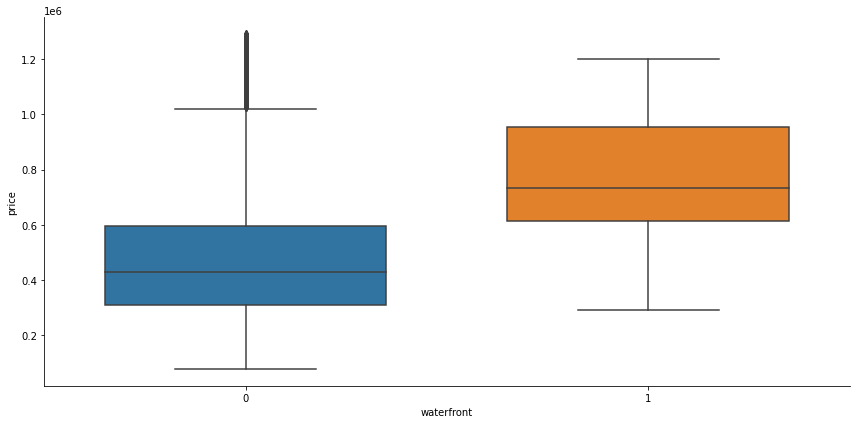

In [52]:
sns.catplot(data=data, x='waterfront', y='price', kind='box', height=6, aspect=2, width=.7)

##### Conclusão
* FALSO

In [53]:
print(f'Imóveis que possuem vista para o mar, são em média, {h1_result:.2f}% mais caros do \
que imóveis sem vista para o mar.')

Imóveis que possuem vista para o mar, são em média, 62.90% mais caros do que imóveis sem vista para o mar.


#### H2) Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
___

##### Cálculo em porcentagem

In [54]:
old_houses = data.loc[data['yr_built'] <= 1955].price.mean()
new_houses = data.loc[data['yr_built'] > 1955].price.mean()

In [55]:
h2_result = diff_mean(new_houses, old_houses)

##### Criando Visualização

In [56]:
data.loc[data['yr_built'] == 1950, 'price'].mean()

439242.4439252336

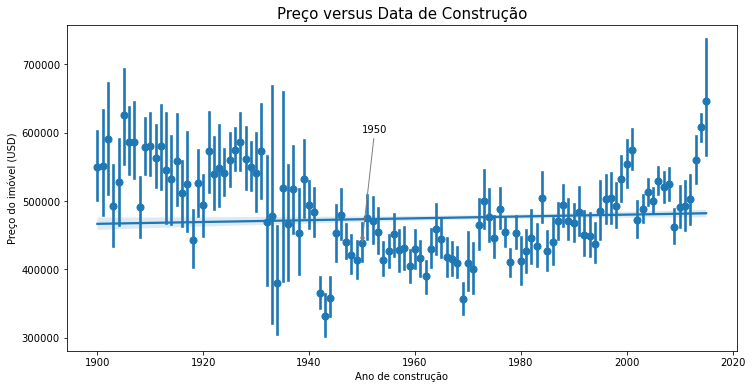

In [57]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot(data=data, x='yr_built', y='price', ax=ax, x_estimator=np.mean)
ax.annotate(text='1950', xy=[1950, data.loc[data['yr_built'] == 1950, 'price'].mean()], xytext=[1950, 600000], \
    arrowprops=dict(arrowstyle="->",
                            color="gray",
                            patchB=None,
                            shrinkB=0,
                            ))

ax.set_title('Preço versus Data de Construção', fontsize=15)
ax.set_ylabel('Preço do imóvel (USD)')
ax.set_xlabel('Ano de construção')

plt.show()

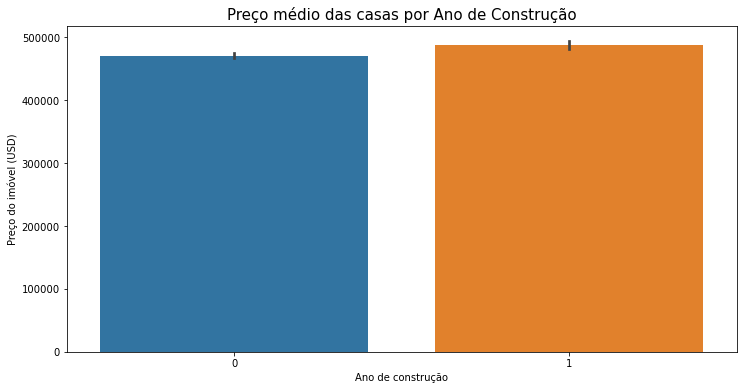

In [58]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=data, x='new_house', y='price', ax=ax)
ax.set_title('Preço médio das casas por Ano de Construção', fontsize=15)
ax.set_ylabel('Preço do imóvel (USD)')
ax.set_xlabel('Ano de construção')

plt.show()

##### Conslusão
* FALSO

In [59]:
print(f'Imóveis com data de construção menor que 1955, são em média, {h2_result:.2f}% mais caros.')

Imóveis com data de construção menor que 1955, são em média, 2.95% mais caros.


#### H3) Imóveis sem porão - possuem área total (sqf|t_lot) - são 40% maiores do que os imóveis com porão.
___

##### Cálculo em porcentagem

In [60]:
mean_area_basement = data.loc[~(data['sqft_basement'] == 0)].sqft_lot.mean()
mean_area_without_basement = data[data['sqft_basement'] == 0].sqft_lot.mean()

In [61]:
h3_result = diff_mean(mean_area_basement, mean_area_without_basement)

##### Criando visualização

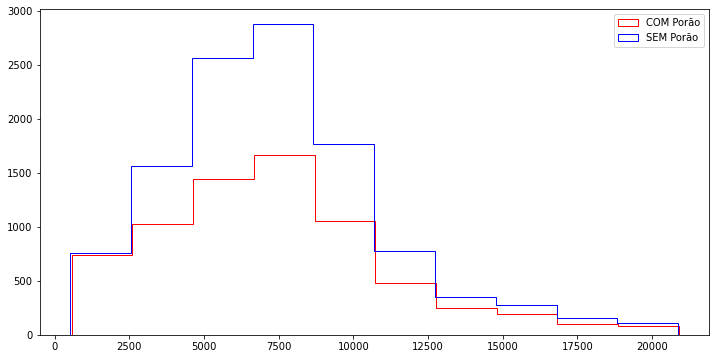

In [62]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(data.loc[~(data['sqft_basement'] == 0)]['sqft_lot'], color='r', histtype='step', label='COM Porão')
ax.hist(data.loc[data['sqft_basement'] == 0]['sqft_lot'], color='b', histtype='step', label='SEM Porão')

ax.legend()
plt.show()

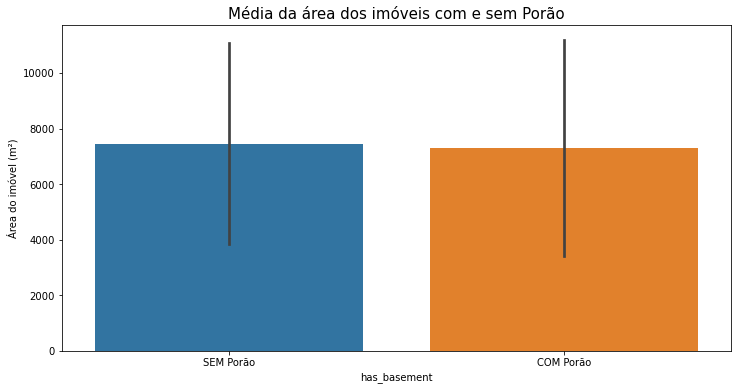

In [63]:
fig, ax = plt.subplots(figsize=(12, 6))


sns.barplot(data=data, x='has_basement', y='sqft_lot', ci='sd', ax=ax)
#ax.bar(x=['COM Porão', 'SEM Porão'], height=[mean_area_basement, mean_area_without_basement])
ax.set_title('Média da área dos imóveis com e sem Porão', fontsize=15)
ax.set_ylabel('Área do imóvel (m²)')
ax.set_xticklabels(['SEM Porão', 'COM Porão'])

plt.show()

##### Conclusão
* FALSO

In [64]:
print(f'Imóveis sem porão, são em média {h3_result:.2f}% maiores do que imóveis com porão.')

Imóveis sem porão, são em média 2.10% maiores do que imóveis com porão.


#### H4) O crescimento do preço dos imóveis YoY (Year over Year) é de 10%.
___

##### Cálculo em porcentagem

In [65]:
yoy = data.groupby('year').agg({'price': ['mean', 'std']})
yoy.head()

price          
          mean       std
year                    
2014 476181.75 219701.39
2015 475962.52 218475.48

In [66]:
yoy.loc[2014].price['mean']

476181.7450105468

In [67]:
h4_result = diff_mean(yoy.loc[2014].price['mean'], yoy.loc[2015].price['mean'])

##### Criando Visualização

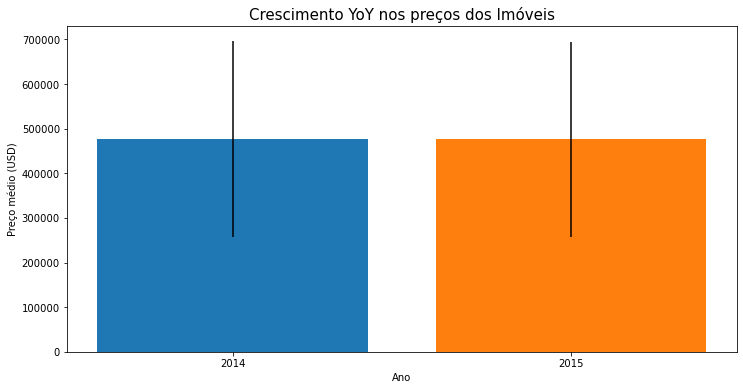

In [68]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar('2014', yoy.loc[2014].price['mean'], yerr=yoy.loc[2014].price['std'])
ax.bar('2015', yoy.loc[2015].price['mean'], yerr=yoy.loc[2015].price['std'])
ax.set_ylabel('Preço médio (USD)')
ax.set_xlabel('Ano')
ax.set_title('Crescimento YoY nos preços dos Imóveis', fontsize=15)

plt.show()

##### Conclusão
* FALSO

In [69]:
print(f"Nota-se uma variação negativa YoY de {h4_result:.2f}% no preço.")

Nota-se uma variação negativa YoY de -0.05% no preço.


#### H5) Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) médio de 15%.
___

##### Cálculo em porcentagem

In [70]:
mom = data.loc[data['bathrooms'] == 3].groupby('month').agg({'price': 'mean'}).reset_index()
mom

,month,price
0,1,601992.00
1,2,527357.32
2,3,611025.13
3,4,647063.13
4,5,580409.82
5,6,613573.51
6,7,621537.82
7,8,608258.00
8,9,602944.58
9,10,578565.44


In [71]:
h5_result = calculate_consecutive_percentage(mom, 'price')

##### Criando Visualização

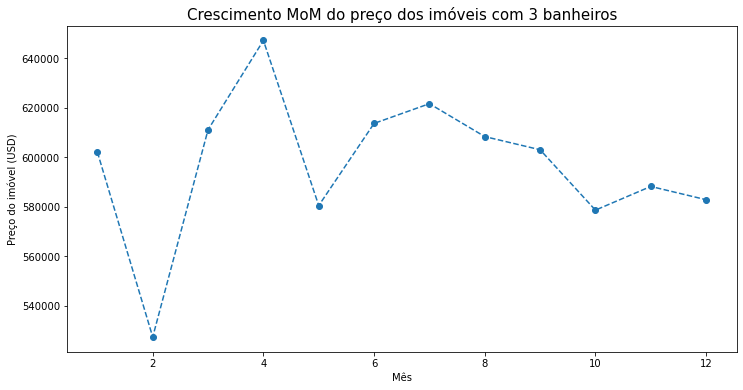

In [72]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(mom['month'], mom['price'], marker='o', linestyle='--')
ax.set_title('Crescimento MoM do preço dos imóveis com 3 banheiros', fontsize=15)
ax.set_ylabel('Preço do imóvel (USD)')
ax.set_xlabel('Mês')

plt.show()

##### Conclusão
* FALSO

In [73]:
print(f'Imóveis com 3 banheiros obtiveram um crescimento MoM (Month over Month) de apenas {h5_result:.2f}%.')

Imóveis com 3 banheiros obtiveram um crescimento MoM (Month over Month) de apenas 0.07%.


#### H6) Imóveis com mais números de quarto são em média 10% mais caros do que outros imóveis com 1 unidade de quartos a menos, em média.
___

##### Cálculo em porcentagem

In [74]:
df_h6 = data.groupby('bedrooms').agg({'price':'mean'}).reset_index()
df_h6

,bedrooms,price
0,2,392812.71
1,3,436743.02
2,4,549244.83
3,5,595915.42


In [75]:
h6_result = calculate_consecutive_percentage(df_h6, 'price')

##### Criando Visualização

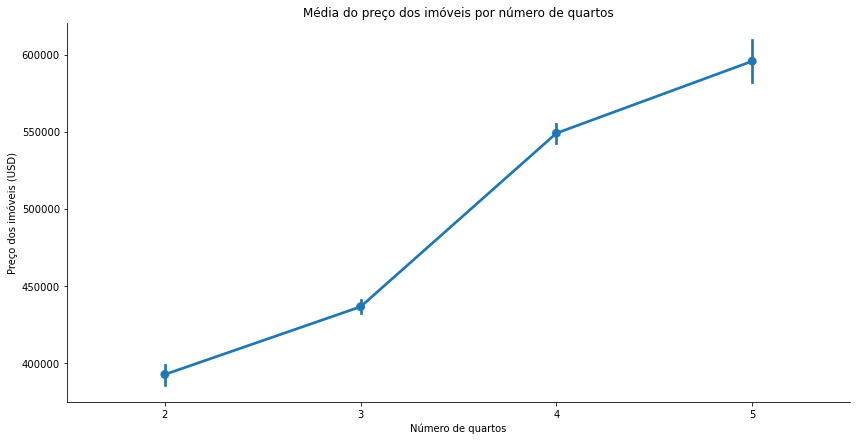

In [76]:
g = sns.catplot(data=data, x='bedrooms', y='price', kind='point', height=6, aspect=2)
g.set(title='Média do preço dos imóveis por número de quartos', ylabel='Preço dos imóveis (USD)', \
    xlabel='Número de quartos')

plt.show()

##### Conclusão
* FALSO

In [77]:
print(f'Imóveis com mais número de quartos, são em média {h6_result}% mais caros do \
que aqueles com uma unidade de quarto a menos.')

Imóveis com mais número de quartos, são em média 18.47% mais caros do que aqueles com uma unidade de quarto a menos.


#### H7) A variação média no preço dos imóveis entre as categorias da variável *condition*, indicam um acréscimo médio de 20% de uma para outra.
___

##### Cálculo em porcentagem

In [78]:
df_h7 = data.groupby('condition').agg({'price':'mean'}).reset_index()
df_h7

,condition,price
0,1,290673.53
1,2,309662.49
2,3,475954.88
3,4,465087.91
4,5,529921.65


In [79]:
h7_result = calculate_consecutive_percentage(df_h7, 'price')

##### Criando visualização

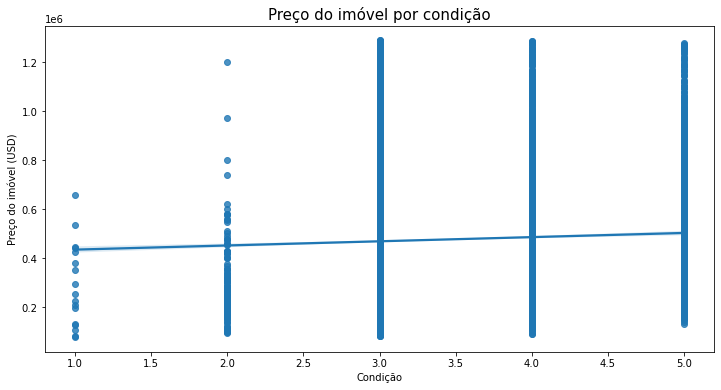

In [80]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot(x=data['condition'].astype(int), y=data['price'], ax=ax)
ax.set_title('Preço do imóvel por condição', fontsize=15)
ax.set_ylabel('Preço do imóvel (USD)')
ax.set_xlabel('Condição')

plt.show()

##### Conclusão
* VERDADEIRO

In [81]:
print(f'Entre as categorias da variável condition, averigou-se um acréscimo \
médio de {h7_result:.2f}% no preço do imóvel.')

Entre as categorias da variável condition, averigou-se um acréscimo médio de 19.32% no preço do imóvel.


#### H8) Imóveis em más condições mas COM vista para o mar, são em média 40% mais caros do que aqueles em mesmas condições mas SEM vista para o mar.
___

##### Cálculo em porcentagem

In [82]:
df_h8_with = data.loc[(data['waterfront'] == 1) & ((data['condition'] == 1) | (data['condition'] == 2))].price.mean()
df_h8_without = data.loc[(data['waterfront'] == 0) & ((data['condition'] == 1) | (data['condition'] == 2))].price.mean()

In [83]:
h8_result = diff_mean(df_h8_without, df_h8_with)

##### Criando Visualização

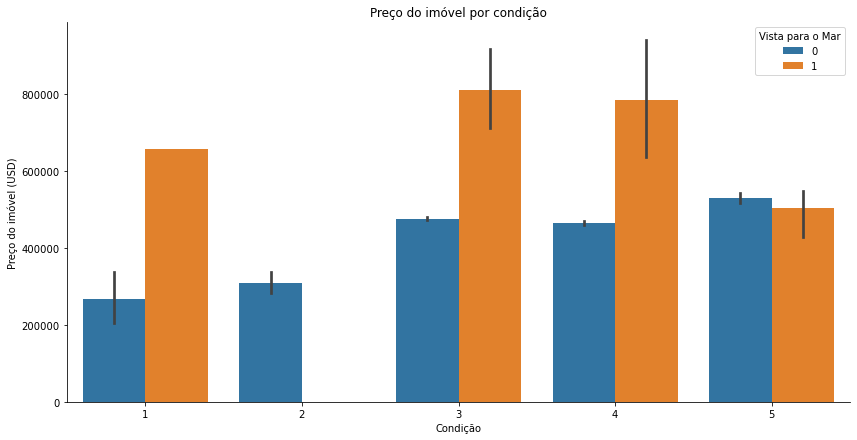

In [84]:
g = sns.catplot(data=data, x='condition', y='price', hue='waterfront', kind='bar', height=6, aspect=2, legend=False)
g.set(title='Preço do imóvel por condição', xlabel='Condição', ylabel='Preço do imóvel (USD)')

plt.legend(loc='upper right', title='Vista para o Mar')
plt.show(g)

##### Conclusão
* FALSO

In [85]:
print(f'Imóveis em más condições mas possuem vista para o mar, são em média {h8_result:.2f}% mais caros do que \
imóveis nas mesmas condições mas não possuem vista para o mar.')

Imóveis em más condições mas possuem vista para o mar, são em média 115.83% mais caros do que imóveis nas mesmas condições mas não possuem vista para o mar.


#### H9) Para cada nível da variável 'grade', o preço médio dos imóveis aumenta em 18%.

##### Cálculo em porcentagem

In [86]:
df_h9 = data.copy()

In [87]:
df_h9_1 =  df_h9.groupby('grade').agg({'price': 'mean'}).reset_index()
df_h9_1

,grade,price
0,4,206300.00
1,5,241265.96
2,6,299811.53
3,7,398963.41
4,8,526899.10
5,9,713663.81
6,10,850157.96
7,11,1003016.79
8,12,1285000.00


In [88]:
h9_result = calculate_consecutive_percentage(df_h9_1, 'price')

##### Criando Visualização

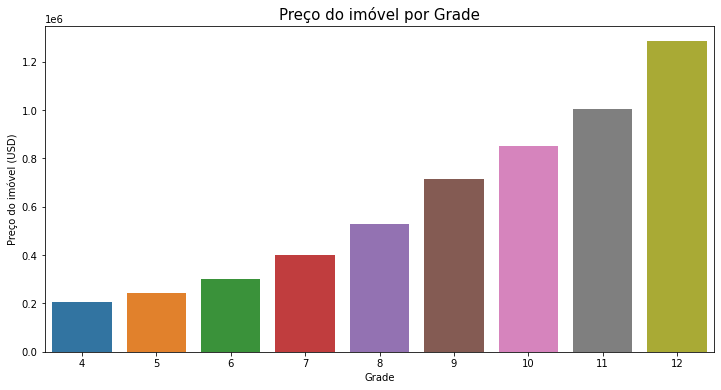

In [89]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=df_h9_1, x='grade', y='price', ax=ax)
ax.set_title('Preço do imóvel por Grade', fontsize=15)
ax.set_xlabel('Grade')
ax.set_ylabel('Preço do imóvel (USD)')

plt.show()

##### Conclusão
* FALSO

In [90]:
print(f'Para cada nível da variável "grade", o preço médio dos imóveis subiu em {h9_result:.2f}%.')

Para cada nível da variável "grade", o preço médio dos imóveis subiu em 25.56%.


#### H10) O crescimento WoW (Week over Week) do preço das propriedades é de 0.1%, na média.
___

##### Cálculo em porcentagem

In [91]:
df_h10 = data.copy()

In [92]:
df_h10_2 = df_h10.groupby('week').agg({'price': 'mean'}).reset_index()

In [93]:
h10_result = calculate_consecutive_percentage(df_h10_2, 'price')

##### Criando Visualização

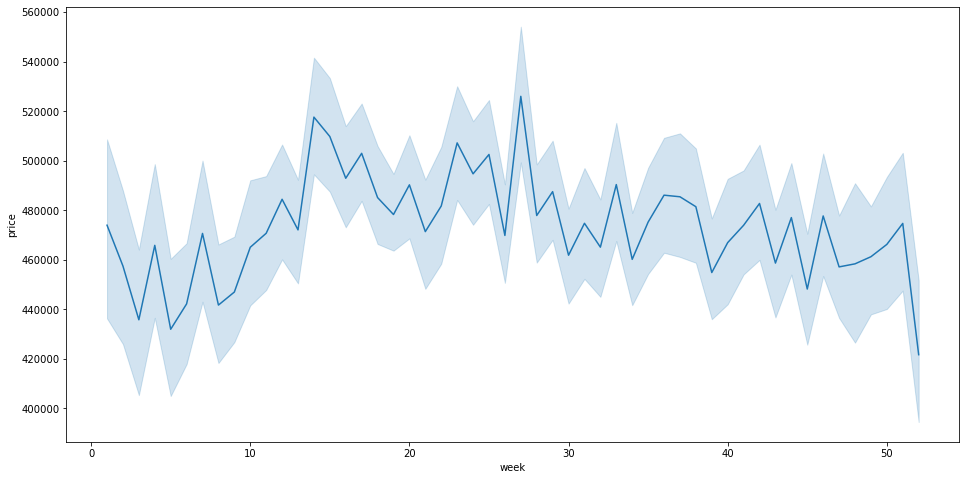

In [94]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.lineplot(data=data, x='week', y='price', markers=True, ax=ax)

plt.show()

##### Conclusão
* VERDADEIRO

In [95]:
print(f'O crescimento WoW (Week over Week) dos imóveis foi de apenas {h10_result:.2f}%, na média.')

O crescimento WoW (Week over Week) dos imóveis foi de apenas 0.11%, na média.


# 6) Main Business Insights

##### *Financial Results for the Business*
After the analysis, among the 21613 properties available for purchase in the King County region, **5809 were suggested for purchase** and detailed in the Dashboard (report 1) for the "CEO".

If the recommended properties are purchased, the initial investment expected is $2.15 billion dollars. Upon resale of all properties, a total of $2.54 billion dollars will be raised and the total expected profit is **$397 million dollars**, totalizing an **18.46% return on the capital initially invested**.


# 7) Next Steps

* Add Docstring to Functions
* Apply more robust techniques to handle outliers
* Create a ML regression model to predict the price of the houses
* Create a ML model to estimate the optimal reselling price for given house
* Create new hyphotesis and validate them